In [84]:
import numpy as np
from scipy.linalg import eig
from matplotlib import pyplot as plt
%matplotlib notebook

In [85]:
def infinite_well(n):
    x = np.linspace(-1,1,int(10e3))
    Φ_functions = []
                    
    for i in range(n):
        Φ = x**i * (x - 1)*(x + 1)
        Φ_functions.append(Φ)
                
    return Φ_functions

In [103]:
def eigen_states(basis_functions,potential=None):
    
    n = len(basis_functions)
    
    S = np.zeros((n,n))   # S matrix
    H = np.zeros((n,n))  # Hameltonian 
    
    for i in range(n):
        for j in range(n):
            S_integral = np.trapz( np.conjugate (basis_functions[i]) *basis_functions[j])
            S[i,j] = S_integral
            
            diff2 = np.gradient ( np.gradient(basis_functions[j]) ) # second differential of basis function
            if potential:
                diff2 += potential(x)
                
            H_integral = np.trapz( np.conjugate( basis_functions[i] ) * diff2)
            H[i,j] = H_integral

            
    eigenvalues, eigenvectors = eig(H, S)
    
    # Sorting in terms of smallest magnitude of eigenvalues
    
    eigenvalues_inds = abs(eigenvalues).argsort()
    sorted_eigenvalues = eigenvalues[eigenvalues_inds]
    sorted_eigenvectors = eigenvectors[:,eigenvalues_inds]
    
    return (sorted_eigenvectors)

In [104]:
def energy_state(basis_functions, En):
    y = np.zeros(len(x))
    for i in range(len(basis_functions)):
        y += sorted_eigenvectors[i,En]* basis_functions[i]
    plt.figure()
    plt.plot(x,y)
    plt.grid()

In [128]:
def potential_barrier(X):
    N = len(X)
    V = np.zeros(N)
    for i in range(N):
        if abs(X[i])<0.5:
            V[i]=1
        else:
            V[i]=0
    return V

def double_well(X):
    return -0.7*X**2 + X**4

<IPython.core.display.Javascript object>


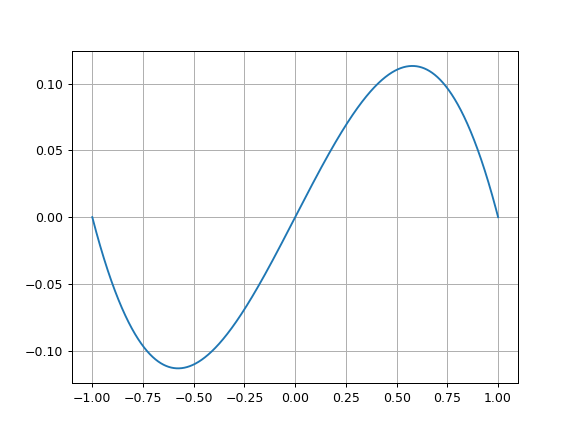

In [129]:
Φ_functions5 = infinite_well(5)
sorted_eigenvectors = eigen_states(Φ_functions5)
energy_state(Φ_functions3, 3)

<IPython.core.display.Javascript object>


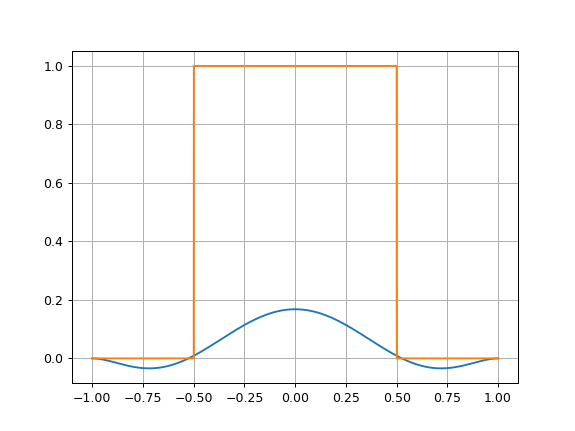

In [134]:
sorted_eigenvectors = eigen_states(Φ_functions5, potential_barrier)
energy_state(Φ_functions5, 2)
plt.plot(x,potential_barrier(x))

<IPython.core.display.Javascript object>


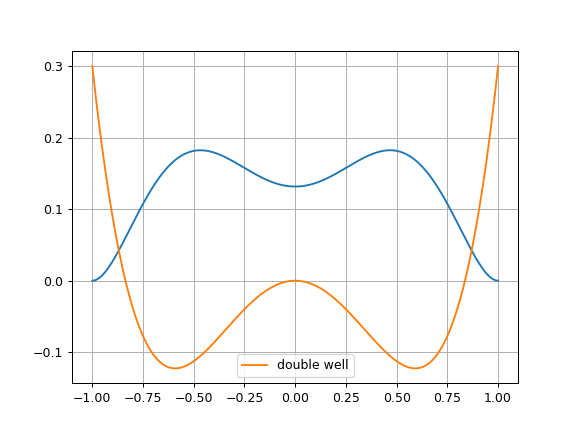

In [135]:
sorted_eigenvectors = eigen_states(Φ_functions5, double_well)
energy_state(Φ_functions5, 0)
plt.plot(x,double_well(x),label='double well')
plt.legend()